## Лабораторна робота №6

Виконав студент групи ФІ-31 Дремко Олександр

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Завдання 1

1. Згенеруйте двовимірні дані (x, y) за допомогою numpy.random: бажано, щоб розподіл точок був навколо деякої наперед заданої прямої (y=k+b) для подальшого аналізу результатів

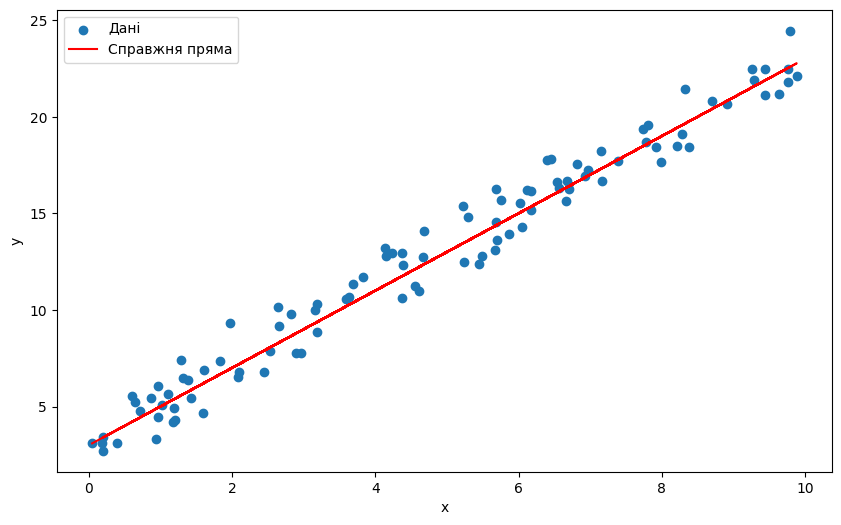

In [2]:
import numpy as np
import matplotlib.pyplot as plt

k = 2
b = 3

np.random.seed(0)
x = np.random.rand(100) * 10
y = k * x + b + np.random.randn(100)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Дані')
plt.plot(x, k*x + b, color='red', label='Справжня пряма')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних оцінок k та b

In [3]:
def least_squares(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    xy_mean = np.mean(x * y)
    xx_mean = np.mean(x * x)
    
    k_opt = (xy_mean - x_mean * y_mean) / (xx_mean - x_mean * x_mean)
    b_opt = y_mean - k_opt * x_mean
    
    return k_opt, b_opt

k_opt, b_opt = least_squares(x, y)
print(f'k = {k_opt}, b = {b_opt}')

k = 1.9936935021402045, b = 3.2221510774472257


3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо такі є).

In [4]:
k_polyfit, b_polyfit = np.polyfit(x, y, 1)
print(f'k = {k_polyfit}, b = {b_polyfit}')

k = 1.9936935021402031, b = 3.2221510774472266


4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви генерували вхідні дані навколо лінії, відобразіть також її

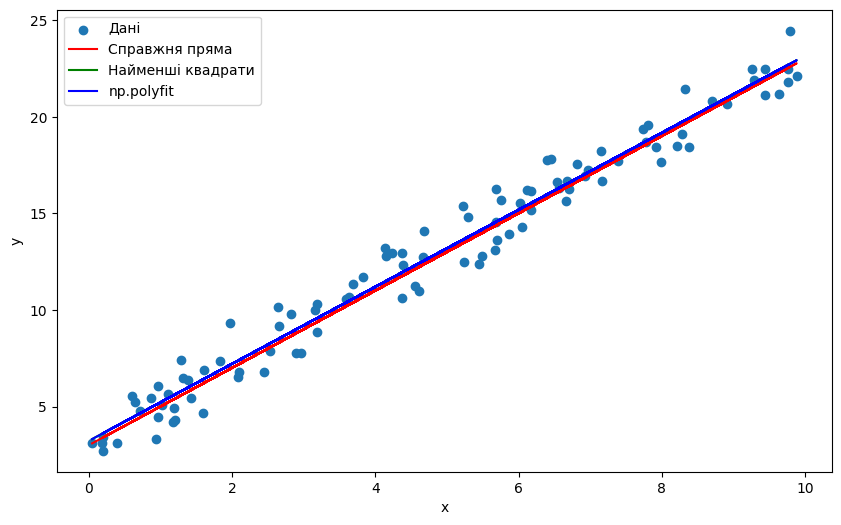

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Дані')
plt.plot(x, k*x + b, color='red', label='Справжня пряма')
plt.plot(x, k_opt*x + b_opt, color='green', label='Найменші квадрати')
plt.plot(x, k_polyfit*x + b_polyfit, color='blue', label='np.polyfit')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Завдання 2

1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних оцінок k та b. Визначіть оптимальні вхідні параметри: learning_rate, n_iter

In [6]:
def gradient_descent(x, y, learning_rate=0.01, n_iter=1000):
    k = b = 0
    n = len(x)
    
    for _ in range(n_iter):
        y_pred = k * x + b
        d_k = (-2/n) * sum(x * (y - y_pred))
        d_b = (-2/n) * sum(y - y_pred)
        k -= learning_rate * d_k
        b -= learning_rate * d_b
    
    return k, b

k_gd, b_gd = gradient_descent(x, y, learning_rate=0.01, n_iter=1000)
print(f'k = {k_gd}, b = {b_gd}')

k = 1.995882944557542, b = 3.208073038295094


2. Додайте отриману лінію регресії на загальний графік

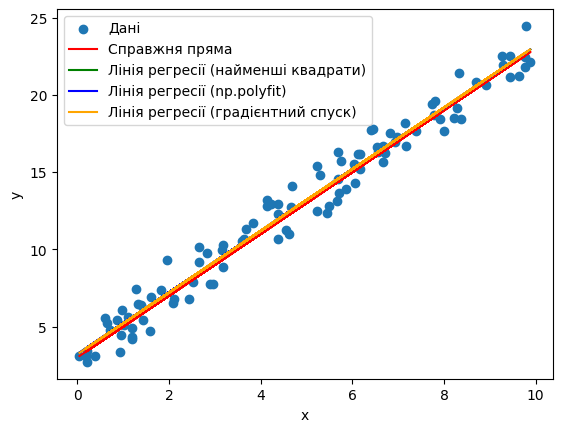

In [7]:
plt.scatter(x, y, label='Дані')
plt.plot(x, k*x + b, color='red', label='Справжня пряма')
plt.plot(x, k_opt*x + b_opt, color='green', label='Лінія регресії (найменші квадрати)')
plt.plot(x, k_polyfit*x + b_polyfit, color='blue', label='Лінія регресії (np.polyfit)')
plt.plot(x, k_gd*x + b_gd, color='orange', label='Лінія регресії (градієнтний спуск)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

3. Побудуйте графік похибки від кількості ітерацій

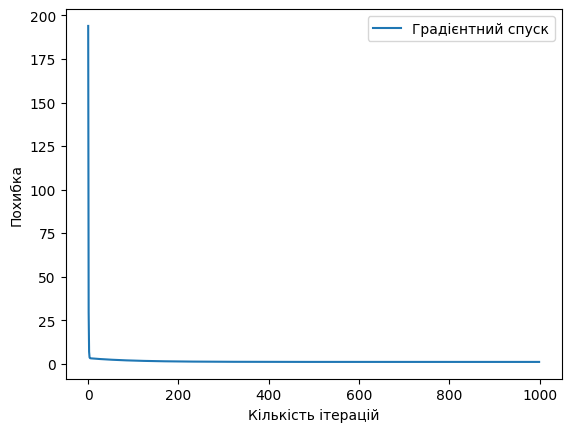

In [8]:
def gradient_descent_with_error(x, y, learning_rate=0.01, n_iter=1000):
    k = b = 0
    n = len(x)
    errors = []
    
    for _ in range(n_iter):
        y_pred = k * x + b
        d_k = (-2/n) * sum(x * (y - y_pred))
        d_b = (-2/n) * sum(y - y_pred)
        k -= learning_rate * d_k
        b -= learning_rate * d_b
        error = sum((y - y_pred) ** 2) / n
        errors.append(error)
    
    return k, b, errors

k_gd, b_gd, errors = gradient_descent_with_error(x, y, learning_rate=0.01, n_iter=1000)

plt.plot(range(1000), errors, label='Градієнтний спуск')
plt.xlabel('Кількість ітерацій')
plt.ylabel('Похибка')
plt.legend()
plt.show()